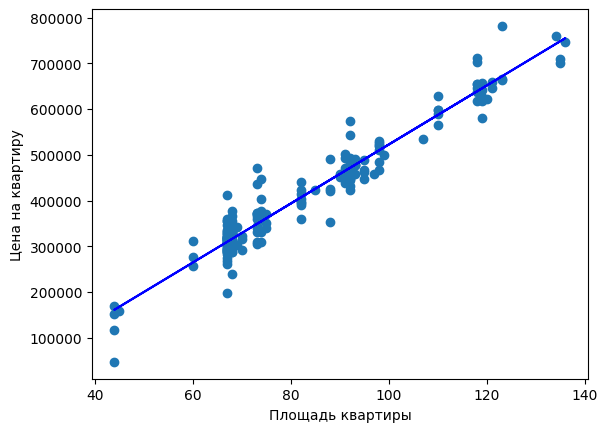

Коэффициент наклона:  6451.705939788316
Пересечение с осью Y:  -122375.10788440733


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Загрузка данных
df = pd.read_csv("./valid.csv")

# Подготовка данных для обучения
x = df.floor_area_sqm.values.reshape(-1, 1)
y = df.price.values

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(x, y)

# Визуализация результатов
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='blue')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена на квартиру')
plt.show()

# Вывод коэффициентов модели
print('Коэффициент наклона: ', model.coef_[0])
print('Пересечение с осью Y: ', model.intercept_)

6451.661778359905 -122371.27831394716


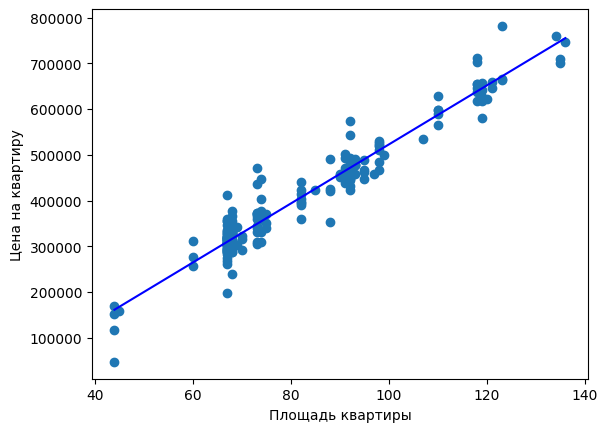

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def mse(x, y, w_, b_):
    n = len(x)
    MSE = np.sum((y - (w_ * x + b_)) ** 2)
    return MSE / n

def move(x, y, old_w, old_b, sw, sb):
    n = len(x)
    grad_w = (-2 / n) * np.sum((y - (old_w * x + old_b)) * x)
    grad_b = (-2 / n) * np.sum(y - (old_w * x + old_b))
    return [old_w - sw * grad_w, old_b - sb * grad_b]

def grad_decent(x, y, max_steps, delta_w, delta_b):
    w = 1
    b = 0
    old_mse = 0
    for i in range(max_steps):
        MSE = mse(x, y, w, b)
        if abs(old_mse - MSE) < 0.00001:
            print(i)
            return [w, b]
        w, b = move(x, y, w, b, delta_w, delta_b)
        old_mse = MSE
    return [w, b]

k, b = grad_decent(df.floor_area_sqm.values, df.price.values, 10000, 0.00012, 0.01)

print(k, b)

min_ = min(df.floor_area_sqm)
max_ = max(df.floor_area_sqm)

plt.scatter(df.floor_area_sqm, df.price)
plt.plot([min_, max_], [min_ * k + b, max_ * k + b], color='blue')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена на квартиру')
plt.show()

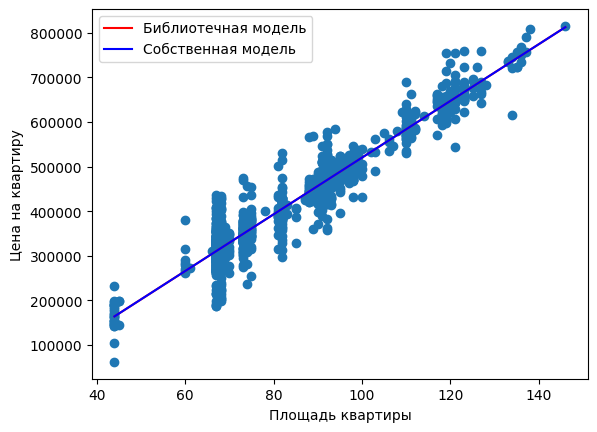

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Загрузка данных
df = pd.read_csv("./dataset_train.csv")

# Обучение модели с использованием библиотеки scikit-learn
model = LinearRegression()
model.fit(df[['floor_area_sqm']], df['price'])

# Обучение собственной модели
def mse(x, y, w_, b_):
    n = len(x)
    MSE = np.sum((y - (w_ * x + b_)) ** 2)
    return MSE / n

def move(x, y, old_w, old_b, sw, sb):
    n = len(x)
    grad_w = (-2 / n) * np.sum((y - (old_w * x + old_b)) * x)
    grad_b = (-2 / n) * np.sum(y - (old_w * x + old_b))
    return [old_w - sw * grad_w, old_b - sb * grad_b]

def grad_decent(x, y, max_steps, delta_w, delta_b):
    w = 1
    b = 0
    old_mse = 0
    for i in range(max_steps):
        MSE = mse(x, y, w, b)
        if abs(old_mse - MSE) < 0.00001:
            print(i)
            return [w, b]
        w, b = move(x, y, w, b, delta_w, delta_b)
        old_mse = MSE
    return [w, b]

k, b = grad_decent(df.floor_area_sqm.values, df.price.values, 10000, 0.00012, 0.01)

# Визуализация данных
min_ = min(df.floor_area_sqm)
max_ = max(df.floor_area_sqm)

plt.scatter(df.floor_area_sqm, df.price)
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена на квартиру')

plt.plot([min_, max_], [min_ * model.coef_[0] + model.intercept_, model.coef_[0] * max_ + model.intercept_],
         color='red', label='Библиотечная модель')

plt.plot([min_, max_], [min_ * k + b, max_ * k + b], color='blue', label='Собственная модель')

plt.legend()
plt.show()

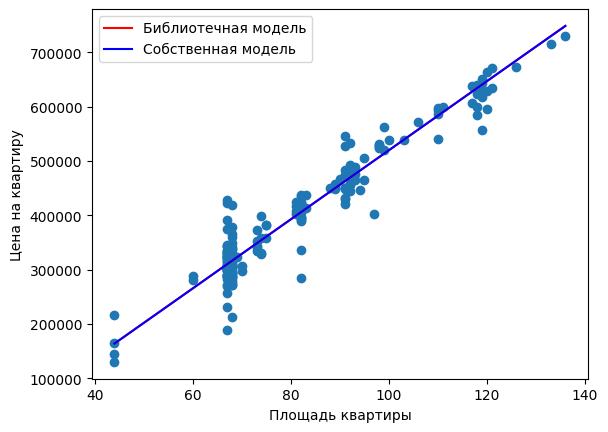

Значение ошибки для нашей модели:  1081281684.7161639
Значение ошибки для библиотечной модели:  1081294859.3752778


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
df = pd.read_csv("./dataset_test.csv")

# Визуализация данных
min_ = min(df.floor_area_sqm)
max_ = max(df.floor_area_sqm)

plt.scatter(df.floor_area_sqm, df.price)
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена на квартиру')

plt.plot([min_, max_], [min_ * model.coef_[0] + model.intercept_, model.coef_[0] * max_ + model.intercept_],
         color='red', label='Библиотечная модель')

plt.plot([min_, max_], [min_ * k + b, max_ * k + b], color='blue', label='Собственная модель')

plt.legend()
plt.show()

error_own_model = mse(df.floor_area_sqm.values, df.price.values, k, b)
error_lib_model = mse(df.floor_area_sqm.values, df.price.values, model.coef_[0], model.intercept_)

print('Значение ошибки для нашей модели: ', error_own_model)
print('Значение ошибки для библиотечной модели: ', error_lib_model)